In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [149]:
# load data
data = pd.read_csv('Salary_dataset.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [150]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [152]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [153]:
data.describe()




,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [154]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The features have a good correlation with one another, meaning they increase and decrease linearly / together

## Exploratory Data Analysis and Pre-processing
- pairplot
- boxplot
- barplot
- scatterplot with the linear line
- salary growth rate: early-stage, mid-stage, late-stage of career. Based on those three categories, how much of salary increament per year, the output is in the form of graphs and number (try with percentage as well)
- salary growth trend: how is the pattern of the early-stage, mid-stage and late-stage of career based on their experience and salary over the time, will it increases or decreases? the output is in the form of graphs and percentage

1. Check and handle - Missing values
2. Check and handle - Duplication
3. Check and handle - Outliers
4. Check and handle - Other Anomalies (negative value, wrong format, etc)

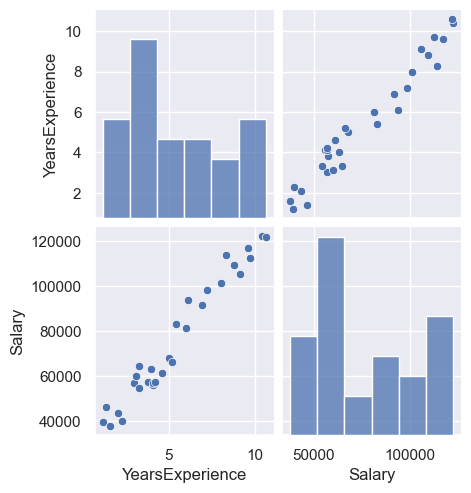

In [155]:
sns.pairplot(data)

<Axes: ylabel='YearsExperience'>

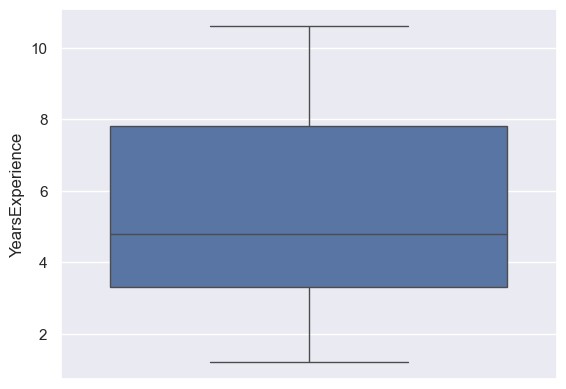

In [156]:
sns.boxplot(data['YearsExperience'])

<Axes: ylabel='Salary'>

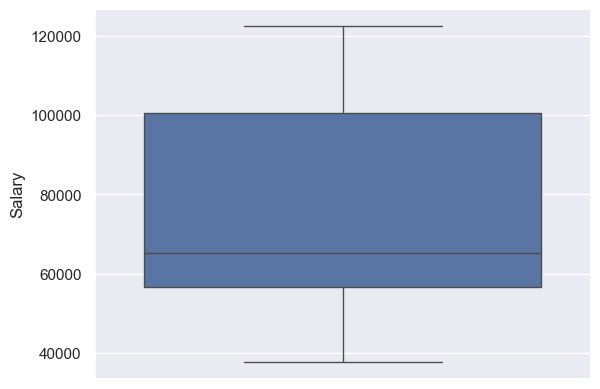

In [157]:
sns.boxplot(data['Salary'])

In [158]:
X = data['YearsExperience'] #independent variable
y = data['Salary'] #dependent variable 

X_mean = np.mean(X)
y_mean = np.mean(y)

# slope = numerator / denominator
# numerator and denominator represents all the data points rises and runs in order to get the slope
# meaning that we can actually search for slope for each data points
numerator = np.sum((X - X_mean) * (y - y_mean)) # change of y (rise)
denominator = np.sum((X - X_mean) ** 2) # change of x (run)

slope = numerator / denominator

# intercept: the point where the line intersects the y-axis/x-axis
intercept = y_mean - slope * X_mean

# regression line
regressionLine = slope * X + intercept

print(numerator, denominator, slope)

2207082.8 233.55466666666666 9449.962321455076


Text(0.5, 1.0, 'regression line with the slope of 9449.96%')

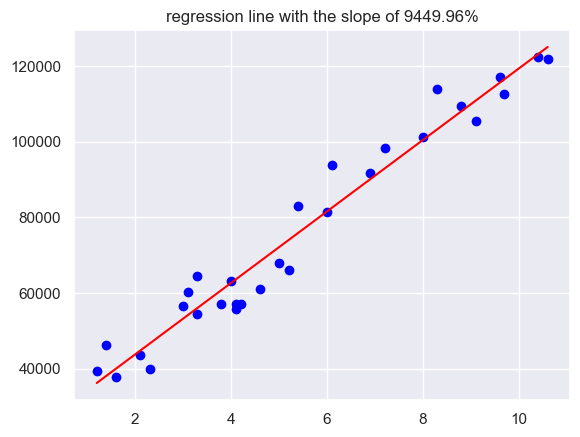

In [159]:
plt.scatter(X, y, color='blue', label='data points')
plt.plot(X, regressionLine, color='red', label=f'regression line with the slope of {slope:.2f}%')
plt.title(f'regression line with the slope of {slope:.2f}%')

#### Salary Growth Rate
early-stage, mid-stage, late-stage of career. Based on those three categories, how much of salary increament (mean) per year, the output is in the form of graphs and number (try with percentage as well)

In [160]:
def stageCategorized(data):
	if data['YearsExperience'] > 10:
		return 'late-stage'
	elif data['YearsExperience'] > 5:
		return 'mid-stage'
	elif data['YearsExperience'] > 0:
		return 'early-stage'
	else:
		return 'no experience'

data['Stage'] = data.apply(stageCategorized, axis=1)

#### Salary Difference of Each Data Point Based On Stages

In [161]:
def salaryIncrement(data):
	data['Difference'] = data.groupby(data['Stage'])['Salary'].diff().shift(-1)
	return data

salaryIncrement(data).head()

,YearsExperience,Salary,Stage,Difference
0,1.2,39344.0,early-stage,6862.0
1,1.4,46206.0,early-stage,-8474.0
2,1.6,37732.0,early-stage,5794.0
3,2.1,43526.0,early-stage,-3634.0
4,2.3,39892.0,early-stage,16751.0


#### Total of Difference Across All Data Points

In [162]:
stageSalaryTotal = data.groupby(data['Stage'])['Difference'].sum().sort_values().reset_index()
stageSalaryTotal

,Stage,Difference
0,late-stage,-519.0
1,early-stage,28595.0
2,mid-stage,46606.0


<Axes: xlabel='Stage', ylabel='Difference'>

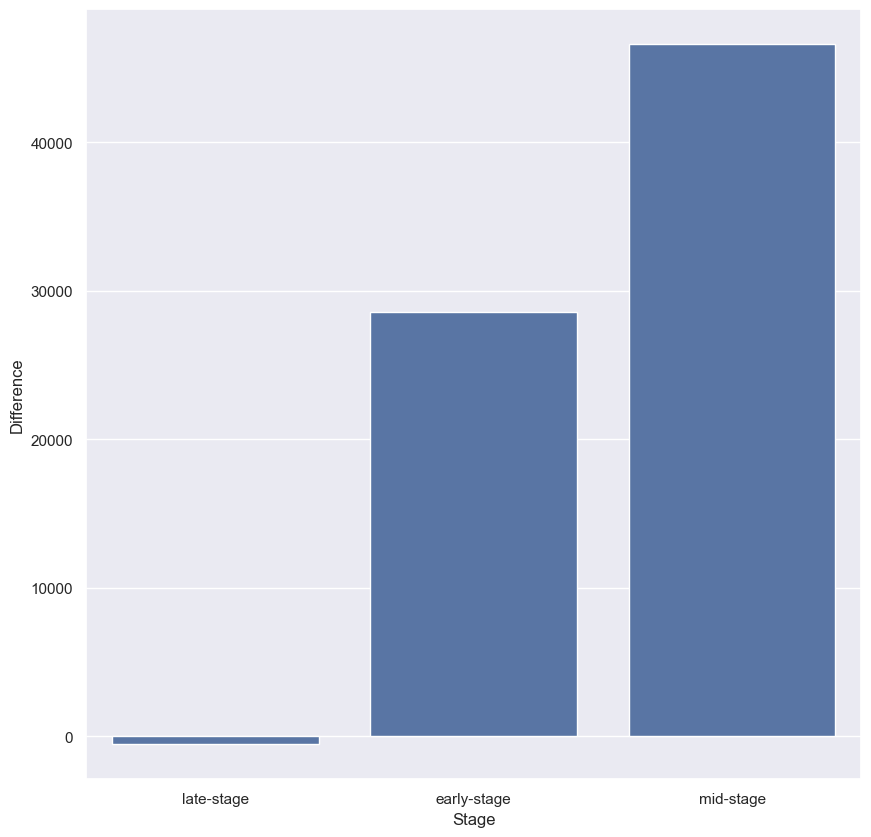

In [163]:
plt.figure(figsize=[10,10])
sns.barplot(x='Stage', y='Difference', data=stageSalaryTotal)

#### Mean of Difference Across All Data Points

In [164]:
stageSalaryMean = data.groupby(data['Stage'])['Difference'].mean().sort_values().reset_index()
stageSalaryMean

,Stage,Difference
0,late-stage,-519.000000
1,early-stage,1906.333333
2,mid-stage,4236.909091


<Axes: xlabel='Stage', ylabel='Difference'>

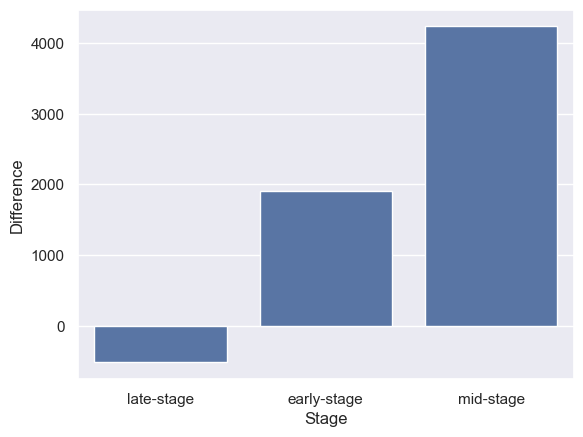

In [165]:
sns.barplot(x='Stage', y='Difference', data=stageSalaryMean)

#### Salary Growth Trend (Percentage)

In [166]:
def salaryGrowthTrend(data):
	return data['Difference'] / data['Salary'] * 100

data['GrowthTrend'] = salaryGrowthTrend(data)
data.head()

,YearsExperience,Salary,Stage,Difference,GrowthTrend
0,1.2,39344.0,early-stage,6862.0,17.441033
1,1.4,46206.0,early-stage,-8474.0,-18.339610
2,1.6,37732.0,early-stage,5794.0,15.355666
3,2.1,43526.0,early-stage,-3634.0,-8.349033
4,2.3,39892.0,early-stage,16751.0,41.990875


<Axes: xlabel='YearsExperience', ylabel='GrowthTrend'>

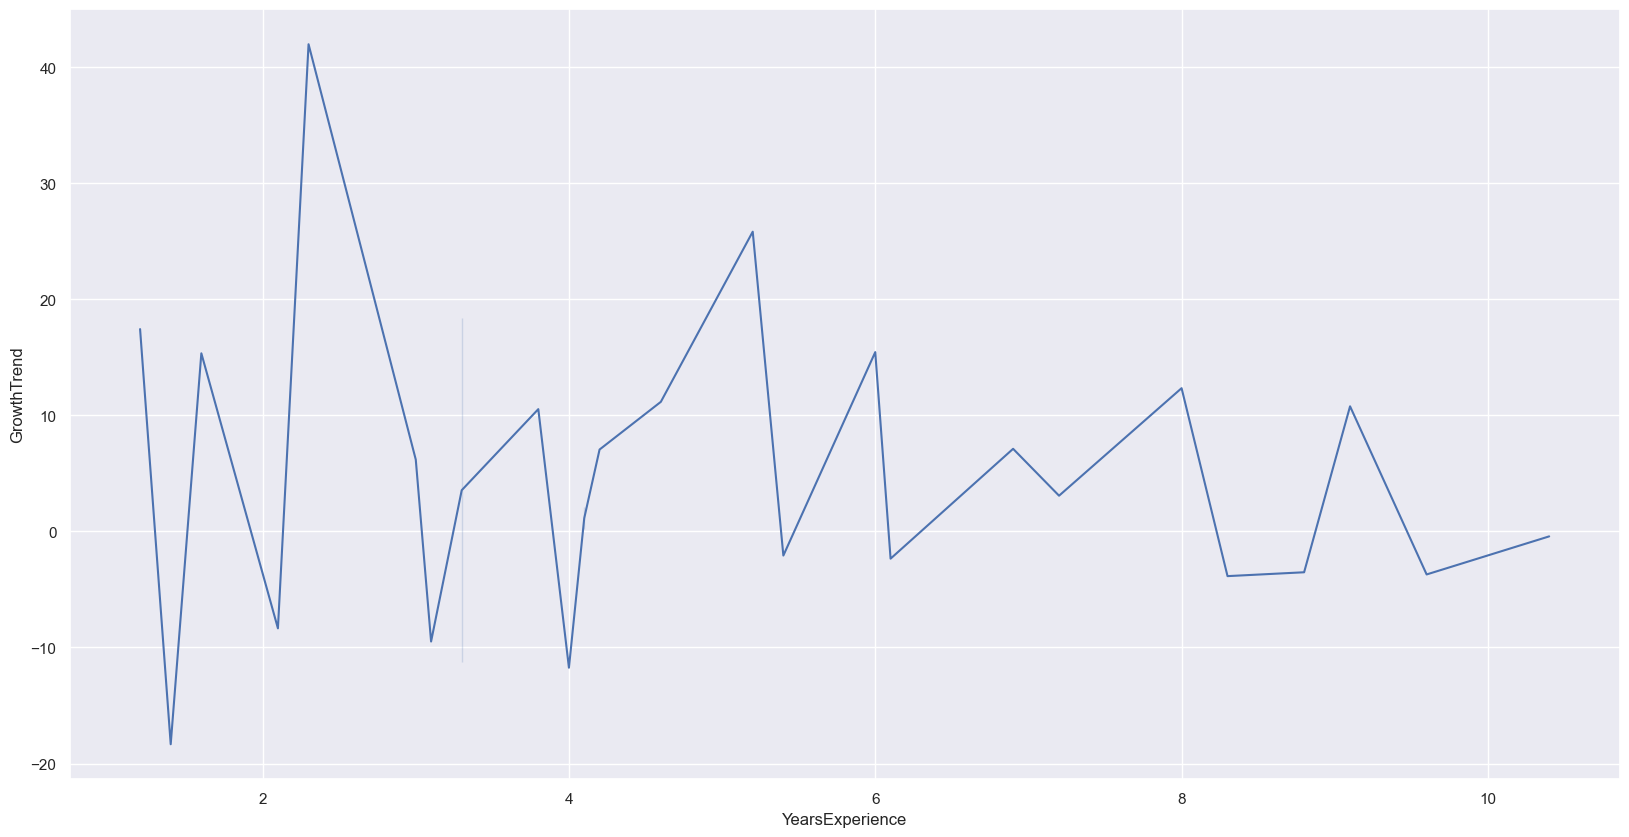

In [167]:
plt.figure(figsize=[20,10])
sns.lineplot(x='YearsExperience', y='GrowthTrend', data=data)

#### Mean of Growth Trend Based On The Stages (Percentage)

In [168]:
stageMeanGrowthTrend = data.groupby('Stage')['GrowthTrend'].mean().sort_values().reset_index()
for i in range(len(stageMeanGrowthTrend)):
	print(f'{stageMeanGrowthTrend.Stage[i]}: {stageMeanGrowthTrend.GrowthTrend[i]:.2f}%') 

late-stage: -0.42%
early-stage: 4.75%
mid-stage: 5.38%


<Axes: xlabel='Stage', ylabel='GrowthTrend'>

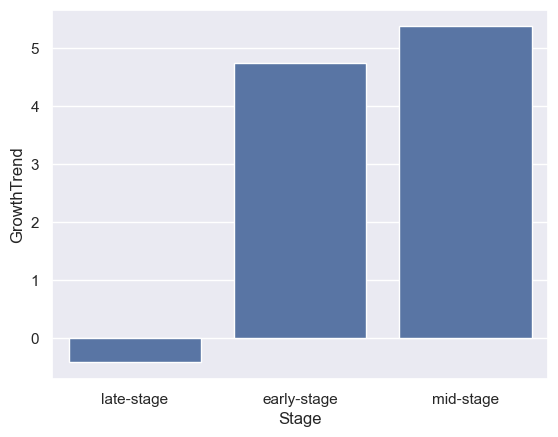

In [169]:
sns.barplot(x='Stage', y='GrowthTrend', data=stageMeanGrowthTrend)

# Modelling And Saving Algorithm
- Train and test split 
- Feature engineering
- Build Algorithm (Linear Regression)
- Test Accuracy (MAE, MAPE, AND ACCURACY)
- Saving Model using pickle

In [170]:
# Train and test split data

class Solution:
	def __init__(self):
		self.theta = None

	# Train, test split and feature engineering
	def train_test_split(self, data, ratio: float, dependent: str, independent: str):
		total_rows = data.shape[0]
		train_size = int(ratio * total_rows)

		train = data[0:train_size]
		test = data[train_size:]

		X_train, y_train = train[independent], train[dependent]
		X_test, y_test = test[independent], test[dependent]

		return X_train, y_train, X_test, y_test

	def linear_regression(self, X_test):
		predictions = []

		for instance in X_test:
			predict = slope * instance + intercept
			predictions.append(predict)

		return predictions
	
	# checking the MAE (Mean Absolute Error) in order to check the deviation of the real data points with the predicted data points
	def meanAbsoluteError(self, y_test, y_pred):
		return np.mean(abs(y_test - y_pred))

	def meanAbsolutePercentageError(self, y_test, y_pred):
		return np.mean(abs((y_test - y_pred) / y_test)) * 100



In [171]:
sol = Solution()
X_train, y_train, X_test, y_test = sol.train_test_split(data, 0.70, 'Salary', 'YearsExperience')
y_pred = sol.linear_regression(X_test)
print(y_pred)
print(y_test)

[92887.93268099974, 100447.9025381638, 103282.89123460032, 108007.87239532785, 110842.86109176438, 115567.84225249193, 116512.83848463742, 123127.81210965599, 125017.804573947]
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [172]:
# saving model
import pickle

model = Solution()
with open('linear_regression.pkl', 'wb') as f:
	pickle.dump(model, f)

In [173]:
# loading model

with open('linear_regression.pkl', 'rb') as f:
	loaded_model = pickle.load(f)

In [ ]:
# testing all the functions

X_train, y_train, X_test, y_test = loaded_model.train_test_split(data, 0.80, 'Salary', 'YearsExperience')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

y_pred = loaded_model.linear_regression(X_test)

print('\nDifferences between the predictions and the real ones: ')
print(y_pred)
print(y_test)

print(f'MAE: {loaded_model.meanAbsoluteError(y_test,y_pred):.2f}')
print(f'MAPE: {loaded_model.meanAbsolutePercentageError(y_test,y_pred):.2f}%') 
print(f'Accuracy: {100 - loaded_model.meanAbsolutePercentageError(y_test,y_pred):.2f}%') 

(24,) (24,) (6,) (6,)

Differences between the predictions and the real ones: 
[108007.87239532785, 110842.86109176438, 115567.84225249193, 116512.83848463742, 123127.81210965599, 125017.804573947]
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64
MAE: 2640.60
MAPE: 2.35%
Accuracy: 97.65%
